In [1]:
#import Dependancies
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

from pathlib import Path
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [53]:
# Create a file path
pop_set = Path("Output/Population.csv")

# Read in the data. 
pop_df = pd.read_csv(pop_set)

#Find min and max population to test our hypothesis
max_city = pop_df.loc[pop_df["Population"].idxmax()]
min_city = pop_df.loc[pop_df["Population"].idxmin()]

#print(max_city, min_city)

In [15]:
# Create a file path
data_set = Path("Output/Capacity.csv")

# Read in the data. 
df = pd.read_csv(data_set)
df

,city ID,city,capacity
0,2,New York,140.0
1,4,New York,200.0
2,5,New York,150.0
3,6,New York,209.0
4,7,New York,301.0
...,...,...,...
95,286,Philadelphia,354.0
96,290,Philadelphia,220.0
97,294,Philadelphia,90.0
98,314,Phoenix,1400.0


---
# Hypothesis
## Does a city’s population affect the capacity of a parking lot?


#### Alternative: If a city’s population is related to the capacity of a parking lot, then a city with a higher density of people will have a parking lot with more capacity offered.


#### Null: If a city’s population is not related to the capacity of a parking lot, then a city with a higher density of people will not offer more parking spaces per parking lot.  
---

In [16]:
# Calculate the capacity mean for Los Angeles (highest population)
population1 = df[df["city"] == "Los Angeles"]
population1.capacity.mean()

174.86666666666667

In [31]:
# Calculate the capacity mean for Atlanta (lowest population)
population2 = df[df["city"] == "Atlanta"]
population2.capacity.mean()

453.6666666666667

In [32]:
#Calculate the pvalue using independent ttest function
stats.ttest_ind(population1.capacity, population2.capacity, equal_var=False)

Ttest_indResult(statistic=-2.078281497209789, pvalue=0.15133837895751248)

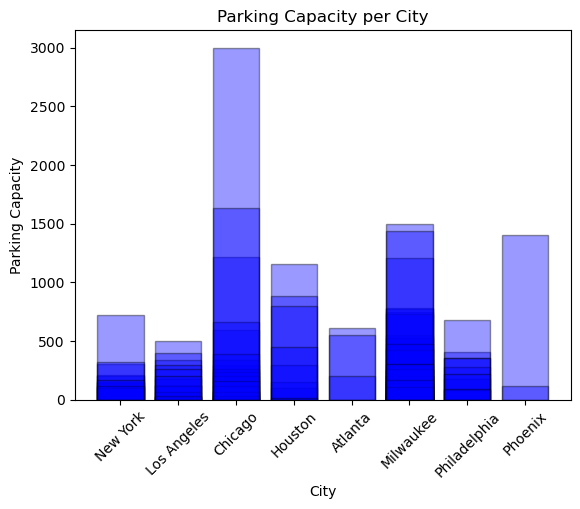

In [52]:
x_values = df["city"]
y_values = df["capacity"]

plt.bar(x_values, y_values, facecolor="blue", edgecolor="black", alpha=0.4)
plt.xlabel("City")
plt.ylabel("Parking Capacity")
plt.title("Parking Capacity per City")
plt.xticks(rotation=45)

#save to output folder
plt.savefig("Output/Capacity_per_City.png", bbox_inches='tight')

plt.show()